<a href="https://colab.research.google.com/github/FeyneurAnaliticaSAS/Modulos-Notebooks/blob/master/Intro_ML_m4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Módulo 4: Introducción al Machine Learning

## Jupyter Notebook y Proyecto Final

In [52]:
# Imports necesarios dentro del notebook

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split #dividir datos de entrenamiento y test.
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score 
from sklearn.metrics import classification_report #Reporte de clasificación
import seaborn as sn #es una biblioteca de visualización de datos de Python basada en matplotlib.
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import KFold
from sklearn import svm
from numpy import nan
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans


In [4]:
# Carga del dataset

iris = load_iris()
X, y = iris.data, iris.target

In [10]:
# Vemos los datos en X, primero convirtiendo a DataFrame

df_X = pd.DataFrame(X)
df_X

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [13]:
# Visualizamos los datos de las etiquetas en Y
df_y = pd.DataFrame(y)
df_y

,0
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


## 1. Análisis descriptivo de los datos

In [15]:
# Estadística Descriptiva
df_X.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2fae93aa50>,
      dtype=object)

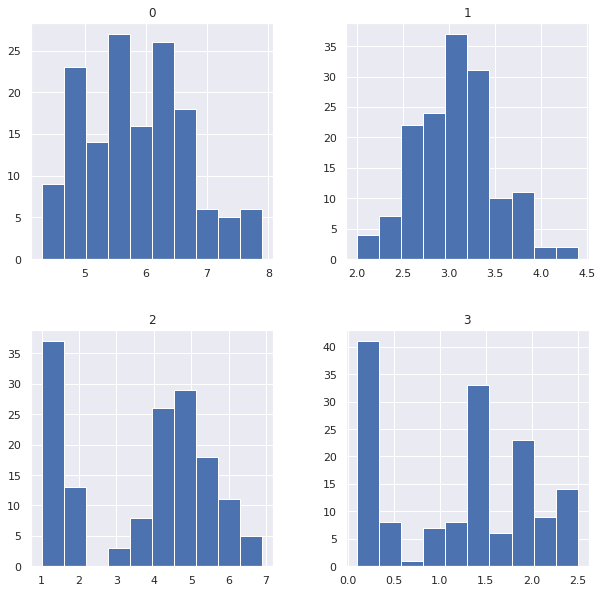

In [22]:
# Creación de Histogramas por variables
df_X.hist( figsize=(10, 10))


,0,1,2,3
0,1.000000,-0.117570,0.871754,0.817941
1,-0.117570,1.000000,-0.428440,-0.366126
2,0.871754,-0.428440,1.000000,0.962865
3,0.817941,-0.366126,0.962865,1.000000


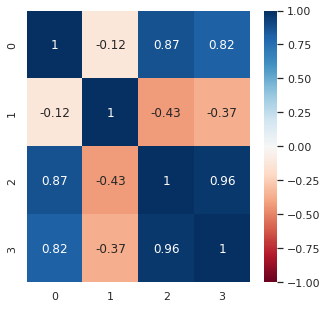

In [19]:
# Matriz de Correlación

# Mostramos la matriz de correlación
matriz_correlacion=df_X.corr()
display(matriz_correlacion)

# Dibujamos un mapa de calor de la matriz
sn.set(rc={'figure.figsize':(5,5)})
sn.heatmap(matriz_correlacion, annot=True, vmin=-1, cmap="RdBu")
plt.show()

## 2. Normalización y Escalado

In [26]:
#Normalización de los Datos

normalization = Normalizer() 
X_norm = normalization.fit_transform(df_X)


In [27]:
# Scalling de los datos

scalling = StandardScaler() 
X_scall = scalling.fit_transform(df_X)

## 3. Tratamiento de valores faltantes

In [29]:
# Diversas maneras de tratar los datos faltantes

#Eliminamos las filas con valores faltantes, que en este caso estaban marcadas con NaN
df_no_Nan = df_X.dropna() 

#Eliminación de todas las columnas con un porcentaje faltante (toda columna con hasta 20% de datos faltantes)
df_no_Nan_col = df_X.loc[:, df_X.isnull().sum() < 0.2*df_X.shape[0]]

# Remplazamos valores faltantes (NaN) con la funcion interpolación
df_inter= df_X.interpolate(limit_direction='both');

# Remplazamos valores faltantes (NaN) con la media
df_media = df_X.copy()
for col in df_X.columns:
    df_media[col].fillna(df_media[col].mean(), inplace=True) 

## 4. Preparación y Separación de Datos

In [39]:
# Separación en datos d eprueba y entrenamiento

# Se separa un 20% para test
train_x,test_x,train_y,test_y=train_test_split(df_X,df_y,test_size=0.2, random_state = 1234)


## 5. Modelos de Aprendizaje Automático

### 5.1 Aprendizaje Supervisado

In [37]:
# Regresión Lineal

reg = LinearRegression()

# Entrenamos al modelo
reg.fit(train_x, train_y)

# Calculamos la prediccion con los datos de test
result = reg.predict(test_x)

# En este caso el resultado no es categorico, ya que la regresion tiene salida continua
display(result)

array([[ 1.31146135],
       [ 1.33725388],
       [ 1.7759539 ],
       [ 0.05904711],
       [ 1.26770139],
       [ 0.03592249],
       [-0.06421803],
       [-0.1094503 ],
       [ 1.18445058],
       [ 1.9695118 ],
       [ 1.05954398],
       [ 0.00398657],
       [ 2.08493497],
       [ 1.29953629],
       [ 0.23058152],
       [ 0.8533216 ],
       [ 2.29559853],
       [-0.0072056 ],
       [ 1.76972637],
       [ 1.22492762],
       [ 1.13185592],
       [ 1.31367393],
       [ 1.30117775],
       [ 1.21766624],
       [ 2.18737961],
       [-0.07982798],
       [ 1.59957065],
       [ 1.08533651],
       [ 1.91408009],
       [ 0.02031254]])

In [44]:
# Arbol de Decision

reg_arboles = DecisionTreeClassifier(max_depth=15,
            max_features='auto',       
            min_samples_leaf=1, random_state=1234, splitter='best')

# Entrenamos al modelo
reg_arboles.fit(train_x, train_y)

# Calculamos la prediccion con los datos de test
result_arboles = reg_arboles.predict(test_x)

# En este caso el resultado no es categorico, ya que la regresion tiene salida continua
display(result_arboles)

array([1, 1, 2, 0, 1, 0, 0, 0, 1, 2, 1, 0, 2, 1, 0, 1, 2, 0, 2, 1, 1, 1,
       1, 1, 2, 0, 2, 1, 2, 0])

#### Otros Algoritmos Supervisados

Implementar con uso de Sklearn

- Support Vector Machine (SVM)
- Random Forest
- K-NN 
- Stochastic Gradient Descent (SGD)


### 5.2 Aprendizaje No Supervisado

In [54]:
# KMeans

kmeans_model = KMeans(n_clusters=3, init="k-means++")

kmeans_model.fit(train_x)
clusters = kmeans_model.predict(train_x)
display(clusters)

array([2, 2, 0, 2, 1, 0, 0, 0, 0, 2, 0, 2, 0, 1, 1, 0, 2, 1, 1, 1, 0, 1,
       1, 2, 2, 2, 2, 1, 2, 0, 0, 1, 2, 1, 0, 0, 0, 2, 2, 1, 1, 2, 0, 1,
       0, 1, 0, 2, 2, 0, 2, 0, 1, 1, 2, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2, 2,
       2, 0, 0, 0, 2, 2, 0, 2, 2, 1, 2, 2, 0, 2, 2, 0, 0, 1, 2, 2, 2, 2,
       0, 2, 1, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 0, 0, 2, 1, 2, 2, 2, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 2, 0, 0], dtype=int32)

#### Otros Algoritmos No Supervisados

Implementar con uso de Sklearn

- Redes Neuronales Artificiales (ANN)
- Dendograma


## 6. Funciones de Error y Validacion Cruzada

In [47]:
# Accuracy

# Comprobamos el porcentaje de precisión del modelo de arboles
accuracy_score(test_y, result_arboles)

1.0

In [51]:
# Validación Cruzada

kfold = KFold(n_splits=10,shuffle=True, random_state=1234)

scores = cross_val_score(reg_arboles, train_x, train_y, cv= kfold, scoring="accuracy")

display(scores)

array([0.91666667, 1.        , 0.91666667, 0.66666667, 1.        ,
       1.        , 0.75      , 1.        , 0.91666667, 1.        ])

## 7. Exportar Modelos

In [55]:
# Exportar modelo
import pickle

model = reg_arboles

pkl_archivo = "pickle.pkl"

with open(pkl_archivo, 'wb') as file:
  pickle.dump(model, file)

In [58]:
# Importar Modelo

pkl_archivo = "pickle.pkl"

with open(pkl_archivo, 'rb') as file:
  pickle_model = pickle.load(file)


score = pickle_model.score(test_x, test_y)
display(score)

1.0